<a href="https://colab.research.google.com/github/SergioMoreno1060/Signal_Filtering_Arduino_Due/blob/main/Signal_Filtering_Arduino_Due/FIR/filtro_fir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy import signal
from scipy.signal import firwin, lfilter
import matplotlib.pyplot as plt
import pandas as pd

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5
 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9
 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3
 15.4 15.5 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7
 16.8 16.9 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1
 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5
 19.6 

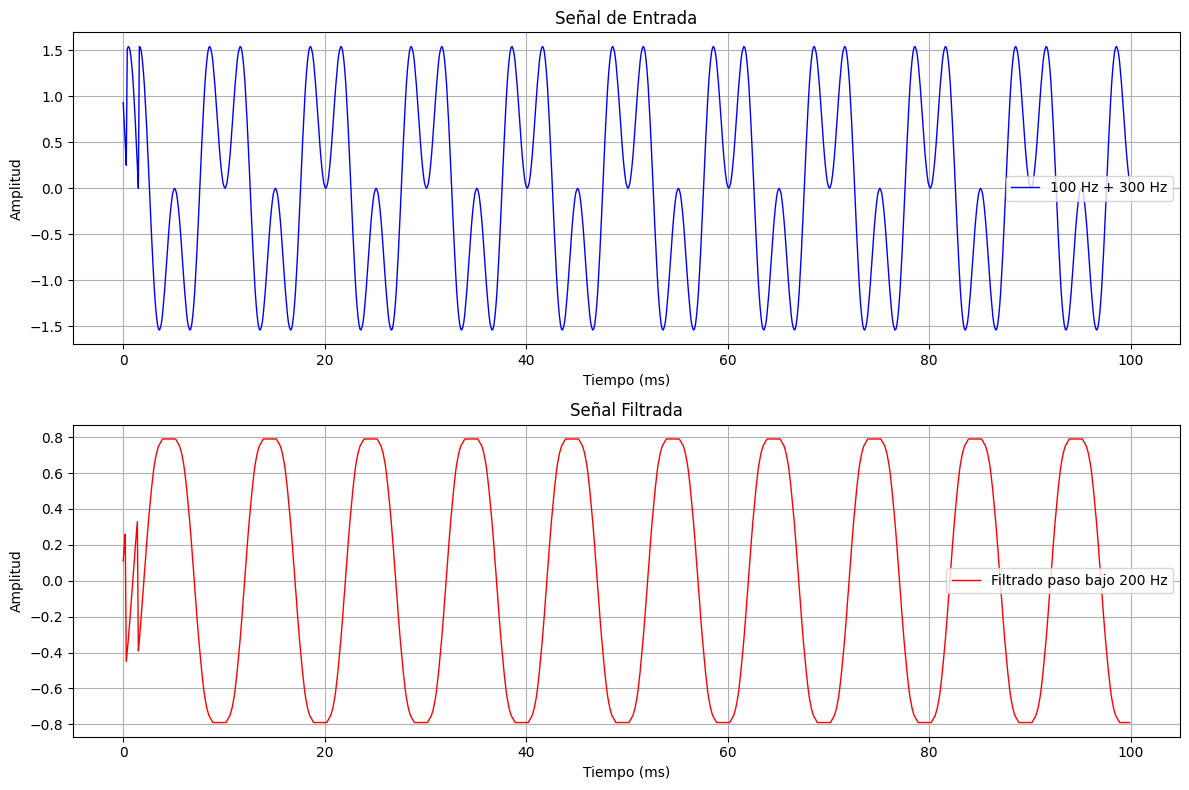

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO

def process_and_plot_signals(input_csv, sample_rate=10000, signal_length=1000):
    # Leer el contenido línea por línea
    lines = input_csv.split('\n')
    cleaned_lines = []

    for line in lines:
        elements = line.strip().split(',')
        if len(elements) == 2:
            try:
                float(elements[0])
                float(elements[1])
                cleaned_lines.append(elements)
            except ValueError:
                continue

    # Crear DataFrame
    df = pd.DataFrame(cleaned_lines, columns=['Input', 'Output'], dtype=float)

    # Crear vector de tiempo (en milisegundos para mejor visualización)
    # Asegurar que solo tomamos signal_length muestras
    time = np.arange(signal_length) / sample_rate * 1000  # convertir a ms

    # Tomar solo las primeras signal_length muestras
    df = df.iloc[:signal_length]

    # Crear figura con dos subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

    # Graficar señal de entrada
    ax1.plot(time, df['Input'], 'b-', linewidth=1, label='100 Hz + 300 Hz')
    ax1.set_title('Señal de Entrada')
    ax1.set_xlabel('Tiempo (ms)')
    ax1.set_ylabel('Amplitud')
    ax1.grid(True)
    ax1.legend()

    # Graficar señal de salida
    ax2.plot(time, df['Output'], 'r-', linewidth=1, label='Filtrado paso bajo 200 Hz')
    ax2.set_title('Señal Filtrada')
    ax2.set_xlabel('Tiempo (ms)')
    ax2.set_ylabel('Amplitud')
    ax2.grid(True)
    ax2.legend()

    # Ajustar layout
    plt.tight_layout()

    # # Calcular y mostrar frecuencias componentes mediante FFT
    # plt.figure(figsize=(12, 6))

    # # FFT de la señal de entrada
    # fft_input = np.fft.fft(df['Input'])
    # freqs = np.fft.fftfreq(len(time), 1/sample_rate)

    # # Solo mostrar frecuencias positivas hasta 500 Hz
    # pos_mask = (freqs >= 0) & (freqs <= 500)

    # plt.plot(freqs[pos_mask], np.abs(fft_input)[pos_mask],
    #          label='Espectro de entrada')
    # plt.grid(True)
    # plt.xlabel('Frecuencia (Hz)')
    # plt.ylabel('Magnitud')
    # plt.title('Espectro de Frecuencia de la Señal de Entrada')
    # plt.legend()

    return df, time, df['Input'], df['Output']

# Leer el archivo
with open('data_filtro_arduino.csv', 'r') as file:
    content = file.read()

# Procesar y graficar
df_signals, time, input, output = process_and_plot_signals(content)
print(time)
# print(input)
# print(output)

plt.show()

In [ ]:
# def generate_test_signal(Fs, duration, f1=40, f2=250):
#     """
#     Genera una señal de prueba con dos frecuencias
#     """
#     t = np.arange(0, duration, 1/Fs)
#     x1 = np.sin(2*np.pi*f1*t)
#     x2 = np.sin(2*np.pi*f2*t)
#     return t, x1 + x2

def generate_test_signal(Fs, n_samples, f1=40, f2=250):
    """
    Genera una señal de prueba con dos frecuencias
    """
    t_final = n_samples * 1/Fs
    n = np.arange(0, n_samples)
    t = np.arange(0, t_final, 1/Fs)
    x1 = np.sin(2*np.pi*f1*n/Fs)
    x2 = np.sin(2*np.pi*f2*n/Fs)
    return n, x1 + x2

def plot_time_domain(t, x, y, title="Señales en el dominio del tiempo"):
    """
    Grafica las señales de entrada y salida en el dominio del tiempo
    """
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(t, x)
    plt.title('Señal de entrada x(t)')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.grid(True)

    plt.subplot(2, 1, 2)
    plt.plot(t, y)
    plt.title('Señal filtrada y(t)')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_magnitude_spectrum(t, x, y, Fs):
    """
    Grafica el espectro de magnitud usando plt.magnitude_spectrum
    """
    plt.figure(figsize=(12, 6))

    # Espectro de magnitud de la señal de entrada
    plt.subplot(2, 1, 1)
    plt.magnitude_spectrum(x, Fs=Fs, scale='dB')
    plt.title('Espectro de magnitud - Señal de entrada')
    plt.grid(True)

    # Espectro de magnitud de la señal filtrada con línea de atenuación
    plt.subplot(2, 1, 2)
    plt.magnitude_spectrum(y, Fs=Fs, scale='dB')
    plt.axhline(y=-25, color='red', linestyle='--', label=f'Atenuación en -25 dB')
    plt.title('Espectro de magnitud - Señal filtrada')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_power_spectral_density(t, x, y, Fs):
    """
    Grafica la densidad espectral de potencia
    """
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    f, Pxx = signal.welch(x, Fs, nperseg=1024)
    plt.semilogy(f, Pxx)
    plt.title('Densidad espectral de potencia - Señal de entrada')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    plt.grid(True)

    plt.subplot(2, 1, 2)
    f, Pyy = signal.welch(y, Fs, nperseg=1024)
    plt.semilogy(f, Pyy)
    plt.title('Densidad espectral de potencia - Señal filtrada')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def plot_system_response(w, Fs):
    """
    Grafica las respuestas del sistema: Bode, fase, Nyquist y polos/ceros
    """
    # Crear sistema FIR
    system = signal.TransferFunction(w, [1], dt=1/Fs)

    # Diagrama de Bode
    plt.figure(figsize=(12, 8))
    w_freq, mag, phase = signal.dbode(system)

    plt.subplot(2, 1, 1)
    plt.semilogx(w_freq, mag)
    plt.grid(True)
    plt.title('Diagrama de Bode - Magnitud')
    plt.ylabel('Magnitud [dB]')

    plt.subplot(2, 1, 2)
    plt.semilogx(w_freq, phase)
    plt.grid(True)
    plt.title('Diagrama de Bode - Fase')
    plt.ylabel('Fase [grados]')
    plt.xlabel('Frecuencia [rad/s]')
    plt.tight_layout()
    plt.show()

    # Diagrama de Nyquist
    plt.figure(figsize=(8, 8))
    w_nyq, h = signal.freqz(w, [1])
    plt.plot(h.real, h.imag)
    plt.plot(h.real, -h.imag)
    plt.grid(True)
    plt.title('Diagrama de Nyquist')
    plt.xlabel('Real')
    plt.ylabel('Imaginario')
    plt.axis('equal')
    plt.show()

    # Diagrama de polos y ceros
    plt.figure(figsize=(8, 8))
    zeros = np.roots(w)
    poles = np.zeros(0)  # FIR filter has all poles at origin
    plt.scatter(np.real(zeros), np.imag(zeros), marker='o', label='Zeros')
    plt.scatter(np.real(poles), np.imag(poles), marker='x', label='Poles')
    circle = plt.Circle((0, 0), 1, fill=False)
    plt.gca().add_artist(circle)
    plt.grid(True)
    plt.title('Diagrama de polos y ceros')
    plt.xlabel('Real')
    plt.ylabel('Imaginario')
    plt.axis('equal')
    plt.legend()
    plt.show()

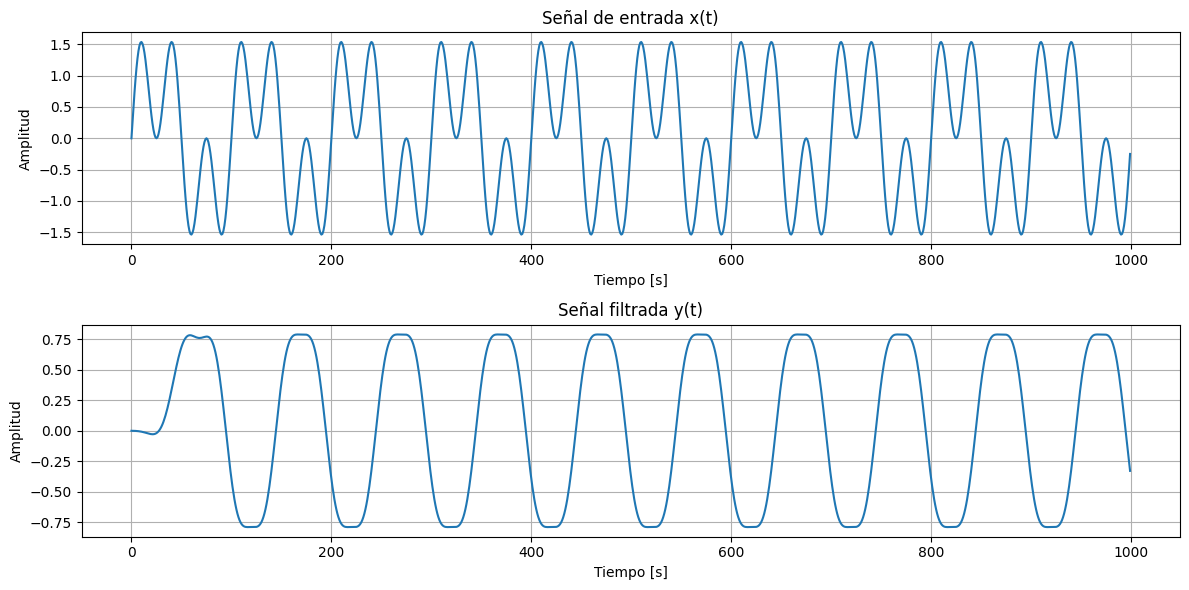

In [ ]:
# # Parámetros del sistema
# Fs = 10000  # Frecuencia de muestreo
# duration = 0.1  # Duración en segundos
# n_samples = 1000
# Fc = 200  # Frecuencia de corte del filtro
# M = 90  # Número de coeficientes del filtro

# # Generar señal de prueba
# t, x = generate_test_signal(Fs, n_samples, f1=100, f2=300)

# # Diseñar filtro FIR
# w = firwin(numtaps=M, cutoff=Fc, window="hamming", fs=Fs)

# # Aplicar filtro
# y = lfilter(w, [1], x)

# # Generar todas las gráficas
# plot_time_domain(t, x, y)

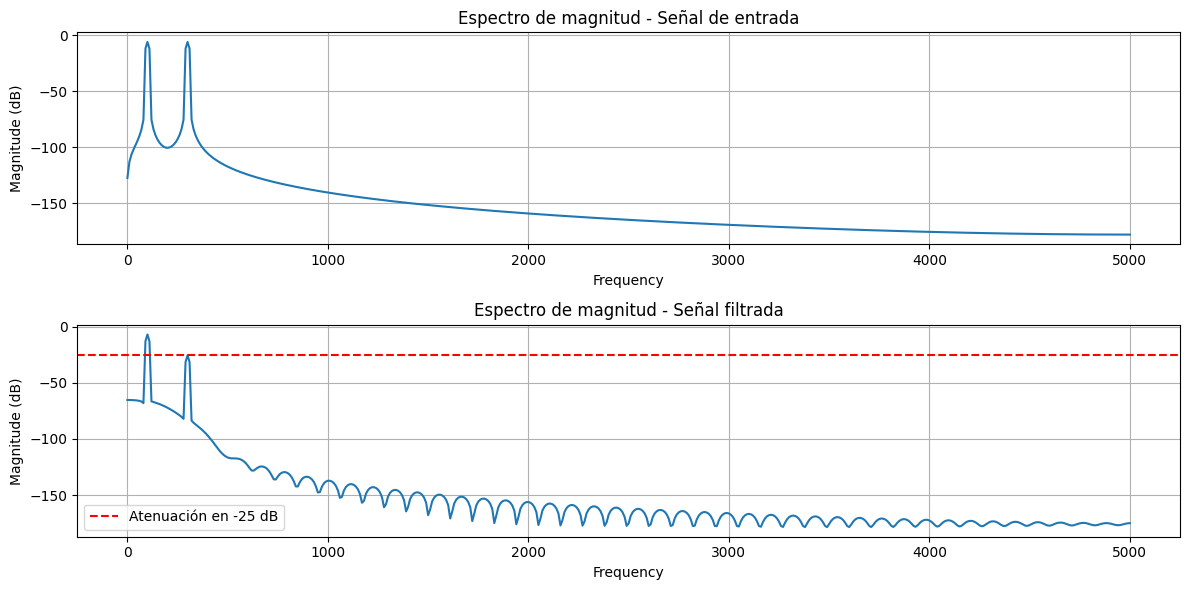

In [ ]:
plot_magnitude_spectrum(time, x, y, Fs)

/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 1024 is greater than input length  = 1000, using nperseg = 1000
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


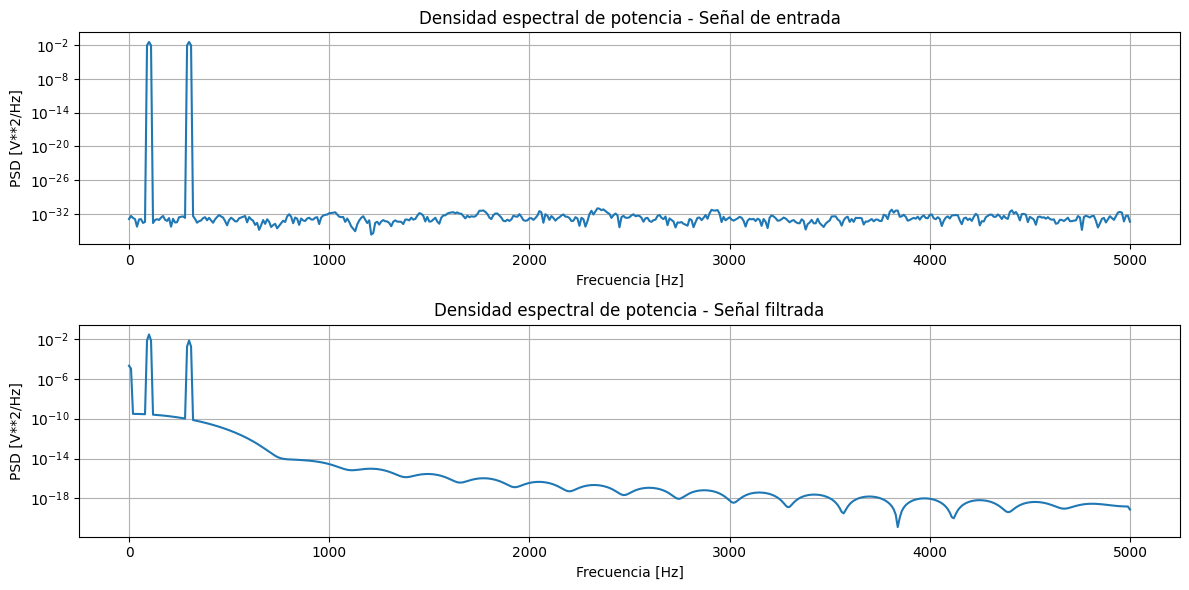

In [ ]:
plot_power_spectral_density(t, x, y, Fs)

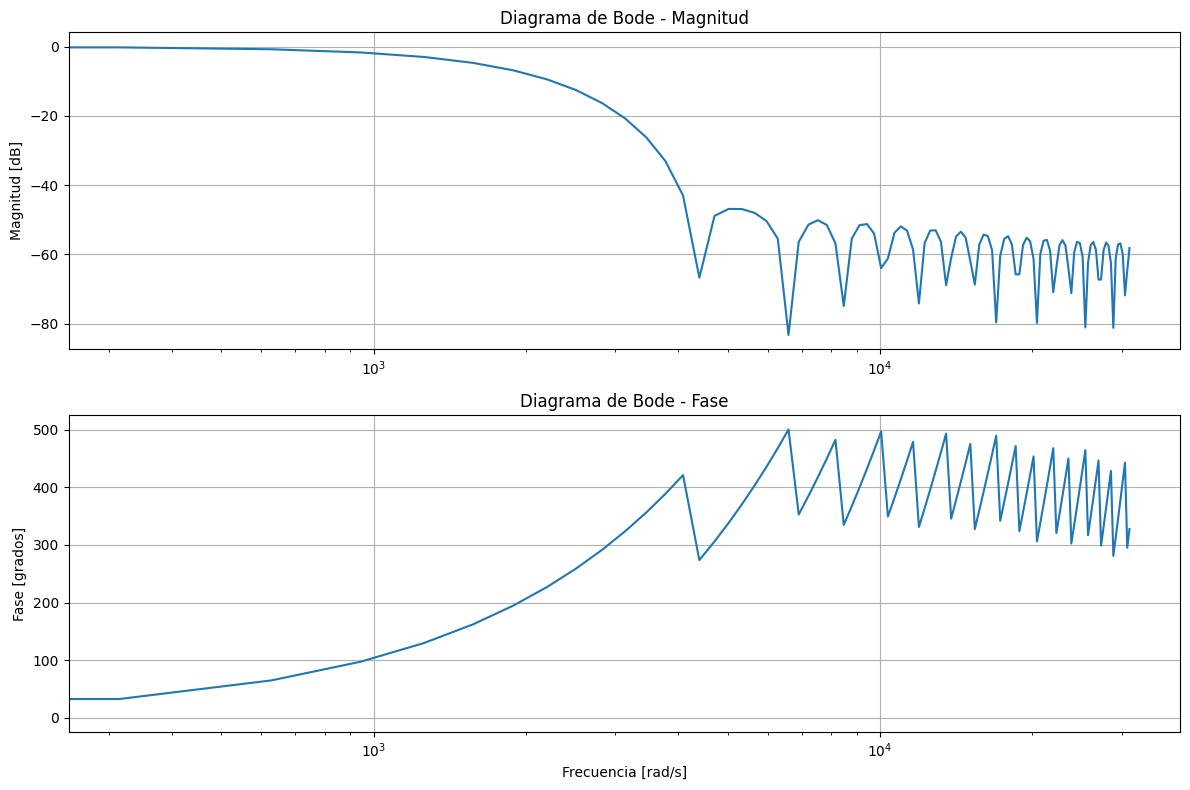

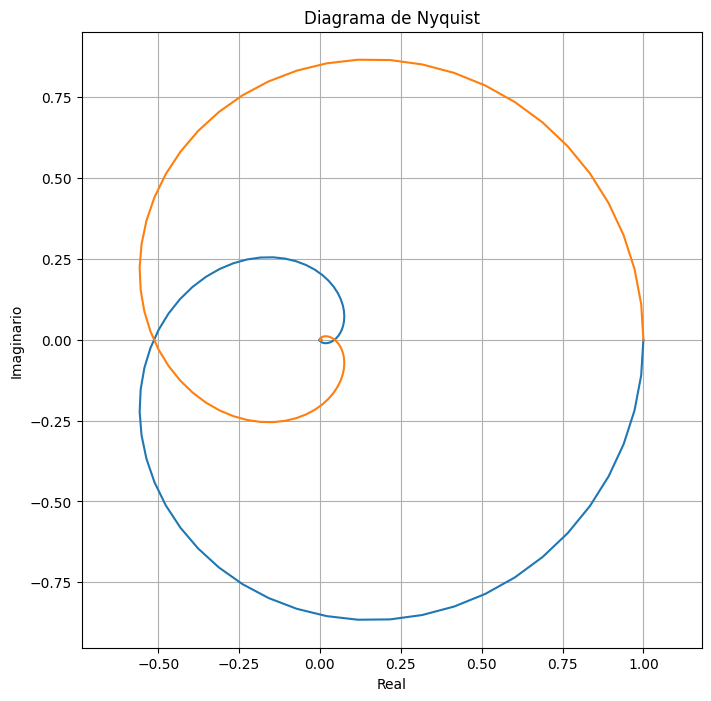

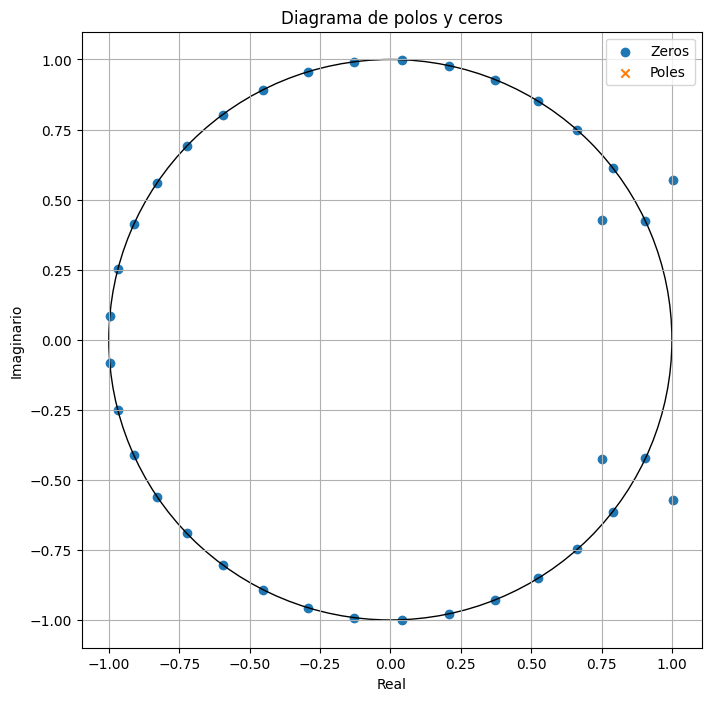

In [ ]:
plot_system_response(w, Fs)

In [ ]:
# Imprimir coeficientes del filtro
print("\nCoeficientes del filtro:")
for i, coef in enumerate(w):
  print(f"h[{i}] = {coef:.6f}")


Coeficientes del filtro:
h[0] = -0.000364
h[1] = -0.000433
h[2] = -0.000512
h[3] = -0.000606
h[4] = -0.000717
h[5] = -0.000845
h[6] = -0.000989
h[7] = -0.001145
h[8] = -0.001309
h[9] = -0.001473
h[10] = -0.001628
h[11] = -0.001763
h[12] = -0.001864
h[13] = -0.001917
h[14] = -0.001908
h[15] = -0.001818
h[16] = -0.001632
h[17] = -0.001334
h[18] = -0.000909
h[19] = -0.000341
h[20] = 0.000381
h[21] = 0.001267
h[22] = 0.002323
h[23] = 0.003555
h[24] = 0.004960
h[25] = 0.006537
h[26] = 0.008276
h[27] = 0.010166
h[28] = 0.012190
h[29] = 0.014328
h[30] = 0.016557
h[31] = 0.018849
h[32] = 0.021175
h[33] = 0.023503
h[34] = 0.025798
h[35] = 0.028027
h[36] = 0.030155
h[37] = 0.032147
h[38] = 0.033972
h[39] = 0.035599
h[40] = 0.037000
h[41] = 0.038151
h[42] = 0.039033
h[43] = 0.039629
h[44] = 0.039930
h[45] = 0.039930
h[46] = 0.039629
h[47] = 0.039033
h[48] = 0.038151
h[49] = 0.037000
h[50] = 0.035599
h[51] = 0.033972
h[52] = 0.032147
h[53] = 0.030155
h[54] = 0.028027
h[55] = 0.025798
h[56] = 0.02

In [ ]:
w

array([-0.00036447, -0.0004325 , -0.00051207, -0.00060631, -0.00071717,
       -0.00084512, -0.00098889, -0.00114531, -0.00130918, -0.00147324,
       -0.00162818, -0.00176275, -0.00186398, -0.00191743, -0.00190755,
       -0.00181805, -0.00163244, -0.00133447, -0.00090868, -0.00034098,
        0.00038086,  0.00126666,  0.00232337,  0.00355462,  0.00496043,
        0.0065369 ,  0.00827605,  0.01016576,  0.01218985,  0.01432819,
        0.01655702,  0.0188493 ,  0.02117519,  0.02350266,  0.02579809,
        0.02802697,  0.0301547 ,  0.03214728,  0.03397216,  0.0355989 ,
        0.03699995,  0.03815127,  0.03903289,  0.03962939,  0.03993029,
        0.03993029,  0.03962939,  0.03903289,  0.03815127,  0.03699995,
        0.0355989 ,  0.03397216,  0.03214728,  0.0301547 ,  0.02802697,
        0.02579809,  0.02350266,  0.02117519,  0.0188493 ,  0.01655702,
        0.01432819,  0.01218985,  0.01016576,  0.00827605,  0.0065369 ,
        0.00496043,  0.00355462,  0.00232337,  0.00126666,  0.00